# Análisis Estadístico y Visualización

En este notebook realizamos el análisis estadístico y las visualizaciones.

Trabajamos sobre el dataset limpio generado en el notebook de limpieza:

`cleaned_customer_loyalty_flights.csv`

El análisis se estructura en tres partes:

- **Fase 2:** Análisis estadístico (numéricas y categóricas).
- **Fase 3:** Visualizaciones para responder preguntas específicas.
- **Fase 4:** Evaluación de diferencias en vuelos reservados según nivel educativo.

In [1]:
# =========================================
# 1) Imports y carga del dataset limpio
# =========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option("display.max_columns", None)

ruta = "../data/processed/cleaned_customer_loyalty_flights.csv"
df = pd.read_csv(ruta)

print("✅ Dataset limpio cargado")
print("Filas:", df.shape[0], "| Columnas:", df.shape[1])

display(df.head())

✅ Dataset limpio cargado
Filas: 401688 | Columnas: 25


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,False
1,100018,2017,2,2,2,4,1320,132.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,False
2,100018,2017,3,14,3,17,2533,253.0,438,36,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,False
3,100018,2017,4,4,0,4,924,92.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,False
4,100018,2017,5,0,0,0,0,0.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,False


## 2.1 Estadísticas descriptivas de variables numéricas

Calculamos estadísticas básicas de las variables numéricas relevantes:

- Media
- Mediana
- Desviación estándar
- Valores mínimo y máximo

El objetivo es entender el comportamiento general de las métricas de actividad y valor del cliente.

In [2]:
print("📊 ESTADÍSTICAS DESCRIPTIVAS — VARIABLES NUMÉRICAS")
print("-" * 50)

variables_numericas = [
    "flights_booked",
    "flights_with_companions",
    "total_flights",
    "distance",
    "points_accumulated",
    "points_redeemed",
    "dollar_cost_points_redeemed",
    "salary",
    "clv"
]

display(df[variables_numericas].describe().T)

print("\n📌 Medianas:")
display(df[variables_numericas].median().to_frame(name="mediana"))


📊 ESTADÍSTICAS DESCRIPTIVAS — VARIABLES NUMÉRICAS
--------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
flights_booked,401688.0,4.155374,5.269271,0.00,0.00,1.00,8.00,39.00
flights_with_companions,401688.0,1.041916,2.090835,0.00,0.00,0.00,1.00,20.00
total_flights,401688.0,5.178156,6.533835,0.00,0.00,1.00,10.00,32.00
distance,401688.0,1220.725451,1446.440549,0.00,0.00,524.00,2352.00,11244.00
points_accumulated,401688.0,124.904743,147.982107,0.00,0.00,53.00,240.00,1216.50
points_redeemed,401688.0,30.997660,126.104987,0.00,0.00,0.00,0.00,996.00
dollar_cost_points_redeemed,401688.0,2.508848,10.200090,0.00,0.00,0.00,0.00,80.00
salary,401688.0,77545.453008,30158.390646,15609.00,63985.00,72026.00,82940.00,407228.00
clv,401688.0,7988.896536,6860.785852,1898.01,3980.84,5780.18,8940.58,83325.38



📌 Medianas:


,mediana
flights_booked,1.00
flights_with_companions,0.00
total_flights,1.00
distance,524.00
points_accumulated,53.00
points_redeemed,0.00
dollar_cost_points_redeemed,0.00
salary,72026.00
clv,5780.18


### Interpretación de las estadísticas descriptivas (numéricas)

En las variables de actividad se observa un patrón claro de **muchos ceros y valores bajos**:

- `flights_booked` tiene mediana **1** y el 25% está en **0**, lo que sugiere que muchos clientes reservan pocos vuelos en un mes o incluso ninguno.
- `points_redeemed` y `dollar_cost_points_redeemed` tienen mediana **0**, indicando que en la mayoría de meses no se canjean puntos.
- `distance` y `points_accumulated` también presentan mediana moderada, con presencia de meses sin actividad (valores 0).

También aparecen valores máximos altos (por ejemplo `flights_booked` hasta 39 o `distance` hasta 11.244), lo que sugiere clientes con actividad muy intensa en determinados meses.

En cuanto a variables de perfil:
- `salary` tiene una dispersión amplia (mínimo 15.609 y máximo 407.228), coherente con diferencias entre perfiles.
- `clv` muestra alta variabilidad (hasta 83.325), lo que indica que no todos los clientes aportan el mismo valor a la aerolínea.

## 2.2 Identificación de valores atípicos (outliers)

Para identificar valores atípicos en variables numéricas utilizamos el método del **rango intercuartílico (IQR)**:

- IQR = Q3 − Q1
- Límite inferior = Q1 − 1.5 * IQR
- Límite superior = Q3 + 1.5 * IQR

Además, apoyamos el análisis con **boxplots**, que permiten visualizar rápidamente valores extremos.

📌 DETECCIÓN DE OUTLIERS (método IQR)
--------------------------------------------------


,variable,limite_inferior,limite_superior,n_outliers,%_outliers
1,flights_with_companions,-1.50,2.50,71455,17.79
8,clv,-3458.77,16380.19,35640,8.87
5,points_redeemed,0.00,0.00,24169,6.02
6,dollar_cost_points_redeemed,0.00,0.00,24169,6.02
7,salary,35552.50,111372.50,20592,5.13
2,total_flights,-15.00,25.00,1983,0.49
0,flights_booked,-12.00,20.00,778,0.19
4,points_accumulated,-360.00,600.00,417,0.10
3,distance,-3528.00,5880.00,392,0.10


📊 BOXPLOTS — VARIABLES NUMÉRICAS
--------------------------------------------------


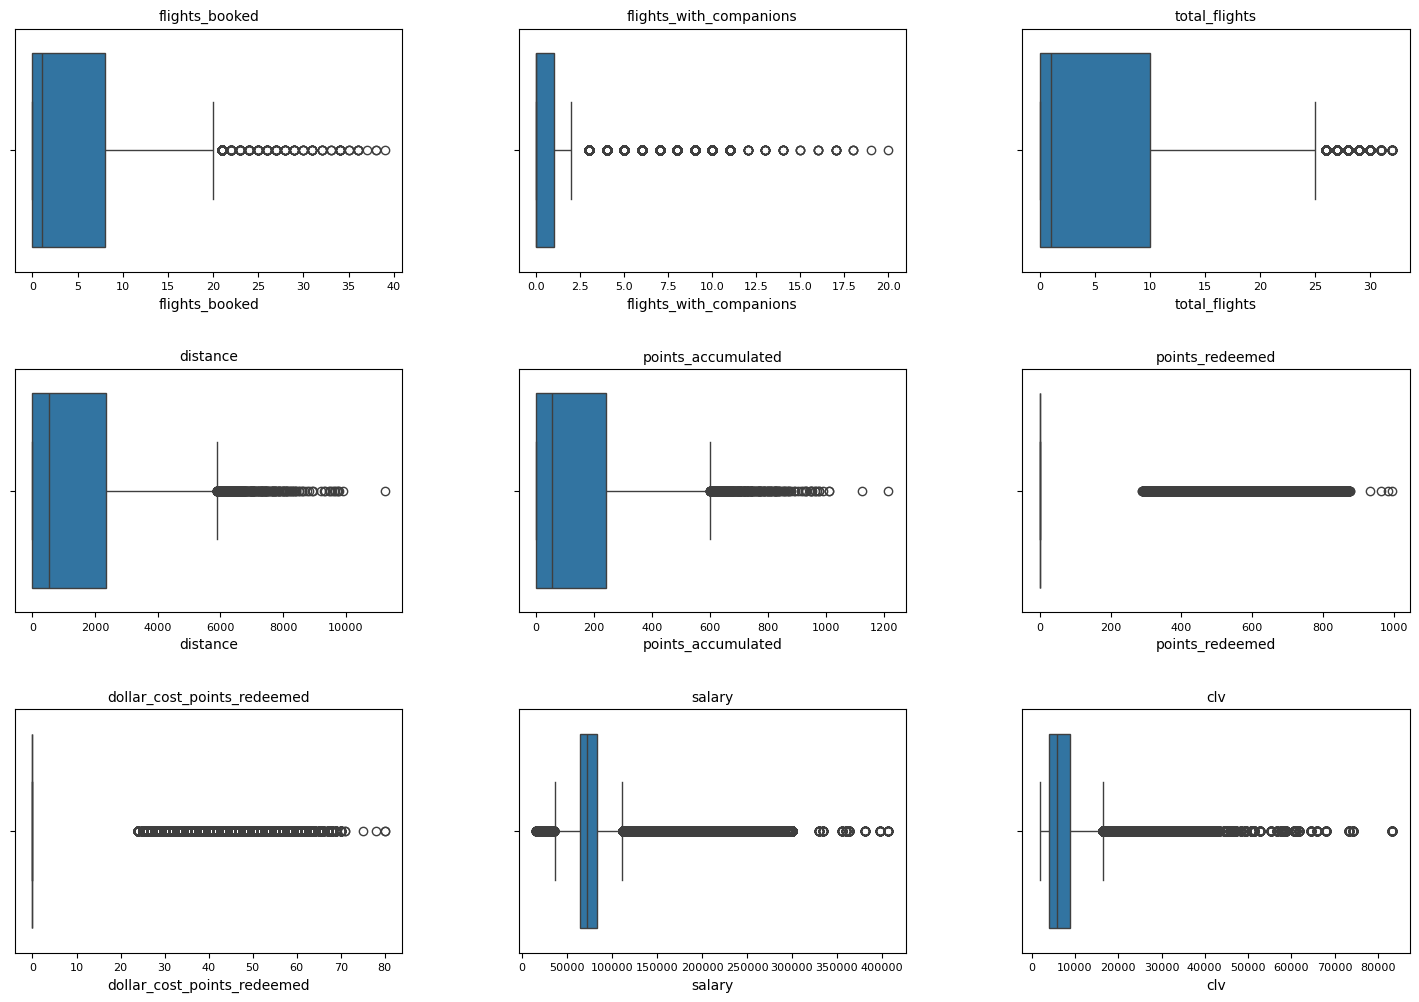

In [5]:
print("📌 DETECCIÓN DE OUTLIERS (método IQR)")
print("-" * 50)

resultados_outliers = []

for col in variables_numericas:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    n_outliers = ((df[col] < limite_inferior) | (df[col] > limite_superior)).sum()
    pct_outliers = round(n_outliers / len(df) * 100, 2)

    resultados_outliers.append([col, limite_inferior, limite_superior, n_outliers, pct_outliers])

tabla_outliers = pd.DataFrame(
    resultados_outliers,
    columns=["variable", "limite_inferior", "limite_superior", "n_outliers", "%_outliers"]
).sort_values("%_outliers", ascending=False)

display(tabla_outliers)

#boxplots para visualizar outliers
print("📊 BOXPLOTS — VARIABLES NUMÉRICAS")
print("-" * 50)

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(variables_numericas):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


### Interpretación de valores atípicos (método IQR)

Según el método IQR, las variables con mayor proporción de valores atípicos son:

- `flights_with_companions` (~17,79%): hay meses donde algunos clientes viajan con acompañantes muchas más veces que la mayoría.
- `clv` (~8,87%): el valor de vida del cliente presenta cola larga; existen clientes mucho más valiosos que el perfil medio.
- `points_redeemed` y `dollar_cost_points_redeemed` (~6,02%): la mayoría de meses no se canjean puntos (mediana 0), pero cuando se canjean aparecen valores claramente más altos, lo que el IQR marca como “outliers”.
- `salary` (~5,13%): existen salarios significativamente por encima del rango central, coherente con perfiles educativos más altos.

En este análisis no eliminamos automáticamente estos valores, ya que pueden representar **comportamientos reales** (clientes muy activos, con alto valor o altos ingresos). En un contexto de modelado, se podría evaluar un tratamiento adicional (por ejemplo transformación log o winsorización), pero para el ejercicio se mantienen y se interpretan.

## 2.3 Análisis de correlación entre variables numéricas (Spearman)

Dado que varias variables numéricas presentan distribuciones sesgadas y valores extremos (outliers),
utilizamos la correlación de **Spearman** en lugar de Pearson.

Spearman:
- trabaja con **rangos** en lugar de valores absolutos,
- es **más robusta frente a outliers**,
- y permite detectar relaciones **monotónicas** (no necesariamente lineales).

El objetivo es identificar relaciones estables entre variables numéricas sin que los valores extremos distorsionen la interpretación.

📌 CORRELACIÓN ENTRE VARIABLES NUMÉRICAS — SPEARMAN
--------------------------------------------------------------------------------


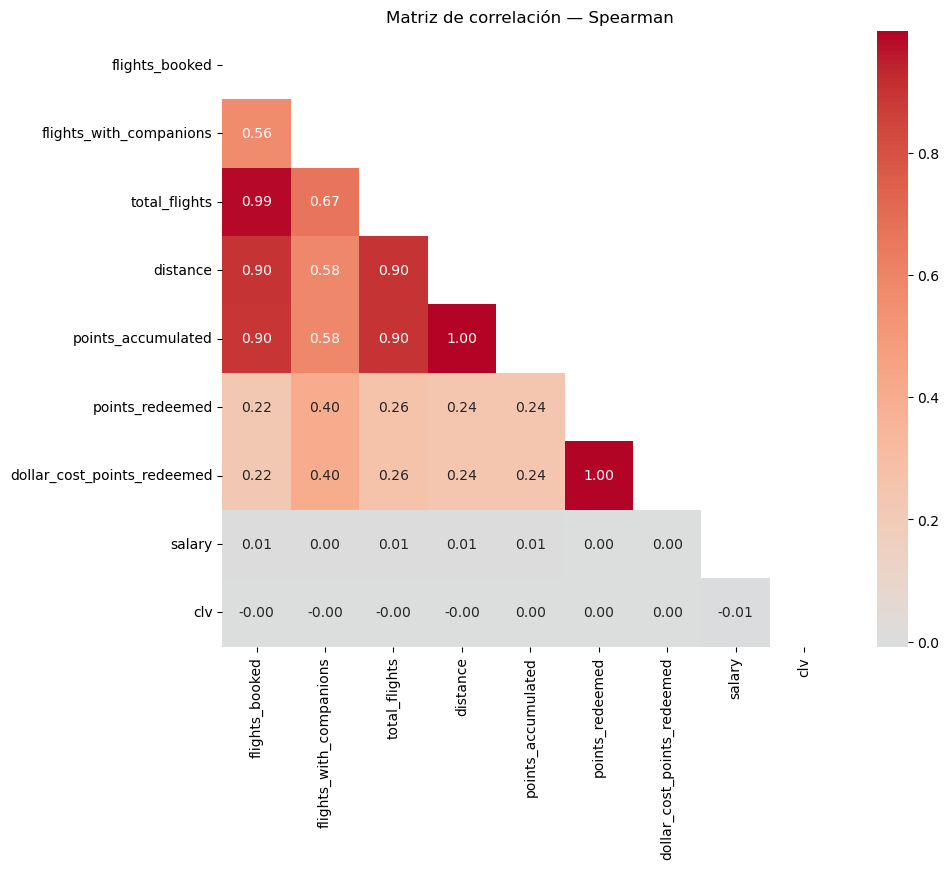


🔎 Top 10 correlaciones (valor absoluto) — Spearman


,variable_1,variable_2,correlacion_abs
0,dollar_cost_points_redeemed,points_redeemed,0.999999
1,points_redeemed,dollar_cost_points_redeemed,0.999999
2,distance,points_accumulated,0.998067
3,points_accumulated,distance,0.998067
4,total_flights,flights_booked,0.987375
5,flights_booked,total_flights,0.987375
6,distance,total_flights,0.902352
7,total_flights,distance,0.902352
8,total_flights,points_accumulated,0.899736
9,points_accumulated,total_flights,0.899736


In [ ]:
print("📌 CORRELACIÓN ENTRE VARIABLES NUMÉRICAS — SPEARMAN")
print("-" * 80)

corr_spearman = df[variables_numericas].corr(method="spearman")

# Mostrar solo media matriz (triángulo inferior)
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_spearman,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Matriz de correlación — Spearman")
plt.show()

# Top 10 correlaciones
corr_abs = corr_spearman.abs().unstack().sort_values(ascending=False)
corr_abs = corr_abs[corr_abs < 1]

top10 = corr_abs.head(10).reset_index()
top10.columns = ["variable_1", "variable_2", "correlacion_abs"]

print("\n🔎 Top 10 correlaciones (valor absoluto) — Spearman")
display(top10)


### Interpretación de correlación

La matriz de Spearman confirma relaciones esperables entre métricas de actividad:

- `points_redeemed` y `dollar_cost_points_redeemed` tienen correlación prácticamente perfecta. Es lógico porque el coste en dólares depende directamente de los puntos canjeados.
- `distance` y `points_accumulated` muestran una correlación muy alta, lo que indica que a mayor distancia volada, más puntos se acumulan.
- `total_flights` y `flights_booked` también presentan una correlación muy fuerte, ya que ambas variables reflejan el volumen de actividad del cliente.

Además, `total_flights` está bastante correlacionada con `distance` y `points_accumulated`, lo que sugiere que los clientes con más vuelos tienden también a volar más distancia y acumular más puntos.

Por otro lado, `salary` y `clv` apenas muestran correlación con las variables de actividad (valores cercanos a 0). Esto indica que, en este dataset, el comportamiento de vuelos y puntos no parece estar fuertemente asociado con el salario o el CLV.

## 2.4 Análisis de variables categóricas (frecuencias)

Analizamos la distribución de frecuencias de las variables categóricas más relevantes
para entender la composición del dataset (por ejemplo, nivel educativo, género, provincia, tipo de tarjeta, etc.).

Este análisis nos sirve como contexto para interpretar posteriormente las visualizaciones y comparaciones.

In [10]:
print("📊 FRECUENCIAS — VARIABLES CATEGÓRICAS")
print("-" * 70)

variables_categoricas = [
    "province",
    "gender",
    "education",
    "marital_status",
    "loyalty_card",
    "enrollment_type",
    "cancelled"
]

for col in variables_categoricas:
    print(f"\n📌 {col}")
    print("-" * 40)

    freq = df[col].value_counts(dropna=False)
    pct = round(df[col].value_counts(dropna=False, normalize=True) * 100, 2)

    tabla = pd.DataFrame({"frecuencia": freq, "%": pct})

    # Para columnas con muchas categorías, mostramos solo top 10
    if tabla.shape[0] > 10:
        display(tabla.head(10))
        print("... (mostrando top 10)")
    else:
        display(tabla)


📊 FRECUENCIAS — VARIABLES CATEGÓRICAS
----------------------------------------------------------------------

📌 province
----------------------------------------


,frecuencia,%
province,,
Ontario,129696,32.29
British Columbia,105816,26.34
Quebec,79200,19.72
Alberta,23256,5.79
Manitoba,15792,3.93
New Brunswick,15264,3.80
Nova Scotia,12432,3.09
Saskatchewan,9816,2.44
Newfoundland,6192,1.54


... (mostrando top 10)

📌 gender
----------------------------------------


,frecuencia,%
gender,,
Female,201840,50.25
Male,199848,49.75



📌 education
----------------------------------------


,frecuencia,%
education,,
Bachelor,251400,62.59
College,101712,25.32
High School or Below,18768,4.67
Doctor,17616,4.39
Master,12192,3.04



📌 marital_status
----------------------------------------


,frecuencia,%
marital_status,,
Married,233640,58.16
Single,107616,26.79
Divorced,60432,15.04



📌 loyalty_card
----------------------------------------


,frecuencia,%
loyalty_card,,
Star,183288,45.63
Nova,136104,33.88
Aurora,82296,20.49



📌 enrollment_type
----------------------------------------


,frecuencia,%
enrollment_type,,
Standard,378384,94.2
2018 Promotion,23304,5.8



📌 cancelled
----------------------------------------


,frecuencia,%
cancelled,,
False,352080,87.65
True,49608,12.35


### Interpretación de variables categóricas

El análisis de frecuencias nos ayuda a entender la composición del dataset:

- **Provincia:** la mayor concentración de registros se encuentra en **Ontario (32,29%)**, **British Columbia (26,34%)** y **Quebec (19,72%)**. Esto indica que gran parte de la base de clientes está agrupada en estas regiones.
- **Género:** la distribución está muy equilibrada (**Female 50,25%** vs **Male 49,75%**), por lo que no hay un sesgo claro por género en la muestra.
- **Nivel educativo:** predomina claramente **Bachelor (62,59%)**, seguido por **College (25,32%)**. El resto de niveles (High School, Doctor, Master) tienen proporciones mucho menores.
- **Estado civil:** la mayoría de clientes están **Married (58,16%)**, seguido por **Single (26,79%)** y **Divorced (15,04%)**.
- **Tipo de tarjeta:** la más común es **Star (45,63%)**, luego **Nova (33,88%)** y **Aurora (20,49%)**, lo que sugiere distintos niveles de fidelización dentro del programa.
- **Tipo de inscripción:** la gran mayoría es **Standard (94,2%)** y una minoría entra por **2018 Promotion (5,8%)**.
- **Cancelación:** solo un **12,35%** de registros corresponden a clientes con cancelación (`cancelled=True`), mientras que el **87,65%** no ha cancelado.

En conjunto, las distribuciones son coherentes y no se observan categorías anómalas. Con este contexto, pasamos a la Fase 3 para responder las preguntas mediante visualizaciones.

## 3.1 Vuelos reservados por mes

Para analizar cómo se distribuyen los vuelos reservados durante el año, agrupamos por `month` y calculamos:

- **Total de vuelos reservados** (`flights_booked`) por mes.

Usamos un **gráfico de barras** porque es la forma más clara de comparar cantidades entre categorías (meses).

📊 Total de vuelos reservados por mes


,month,flights_booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


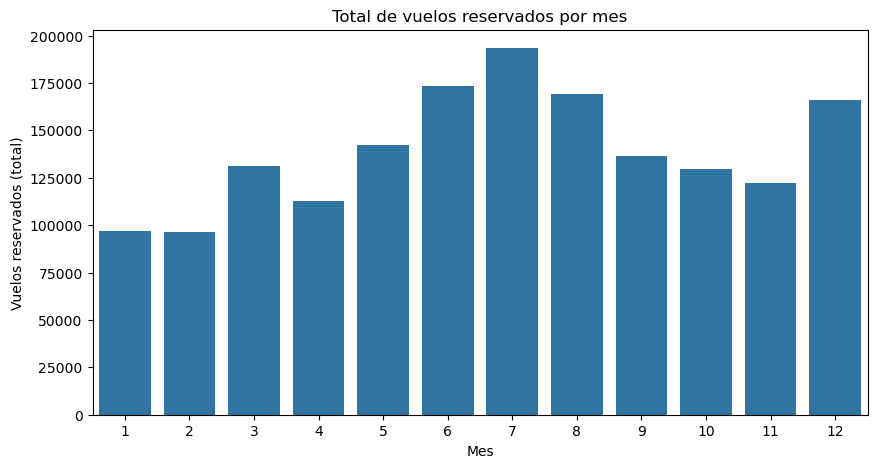

In [11]:
# Total de vuelos reservados por mes
vuelos_por_mes = df.groupby("month")["flights_booked"].sum().reset_index()

print("📊 Total de vuelos reservados por mes")
display(vuelos_por_mes)

plt.figure(figsize=(10, 5))
sns.barplot(data=vuelos_por_mes, x="month", y="flights_booked")
plt.title("Total de vuelos reservados por mes")
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados (total)")
plt.show()

### Interpretación

Se observa una clara estacionalidad en las reservas:

- El mayor volumen de vuelos se concentra en los meses de **verano (junio, julio y agosto)**, con un pico máximo en julio.
- Los meses con menor actividad son enero y febrero, así como noviembre.

Esto sugiere un patrón estacional en el comportamiento de los clientes, posiblemente relacionado con vacaciones y periodos de mayor movilidad.

## 3.2 Relación entre distancia y puntos acumulados

Para analizar si existe relación entre la distancia volada y los puntos acumulados, utilizamos un gráfico de dispersión (scatterplot).

Este tipo de gráfico permite observar visualmente si a mayor distancia corresponden mayores puntos acumulados.

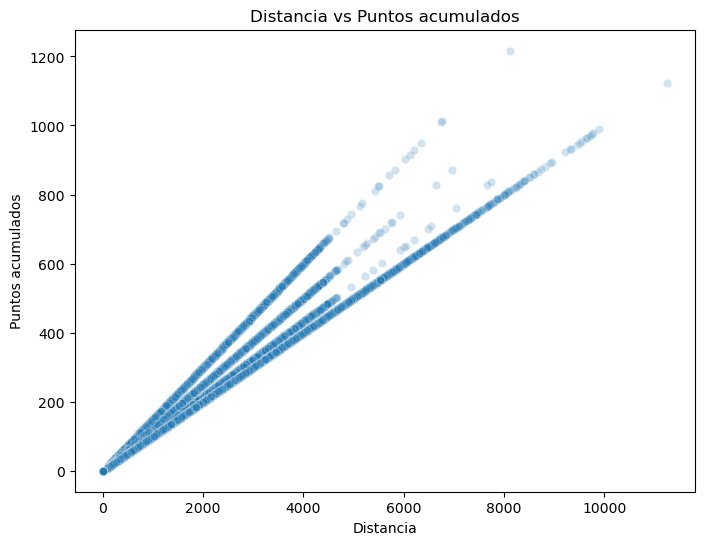

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="distance",
    y="points_accumulated",
    alpha=0.2
)

plt.title("Distancia vs Puntos acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.show()


### Interpretación

El gráfico de dispersión muestra una relación claramente creciente entre la distancia volada y los puntos acumulados.

Se observa un patrón casi perfectamente lineal: a mayor distancia, mayor acumulación de puntos. 
La nube de puntos forma varias “líneas” paralelas, lo que sugiere que los puntos se calculan mediante una regla proporcional (posiblemente con distintos multiplicadores según condiciones del vuelo o tipo de cliente).

La dispersión es muy baja respecto a la tendencia general, lo que confirma una relación muy fuerte entre ambas variables, coherente con el funcionamiento de un programa de fidelización basado en distancia recorrida.

## 3.3 Distribución de clientes por provincia

Para analizar la distribución geográfica de los clientes, representamos el número de registros por provincia mediante un gráfico de barras.

Ordenamos las provincias de mayor a menor frecuencia para facilitar la comparación.

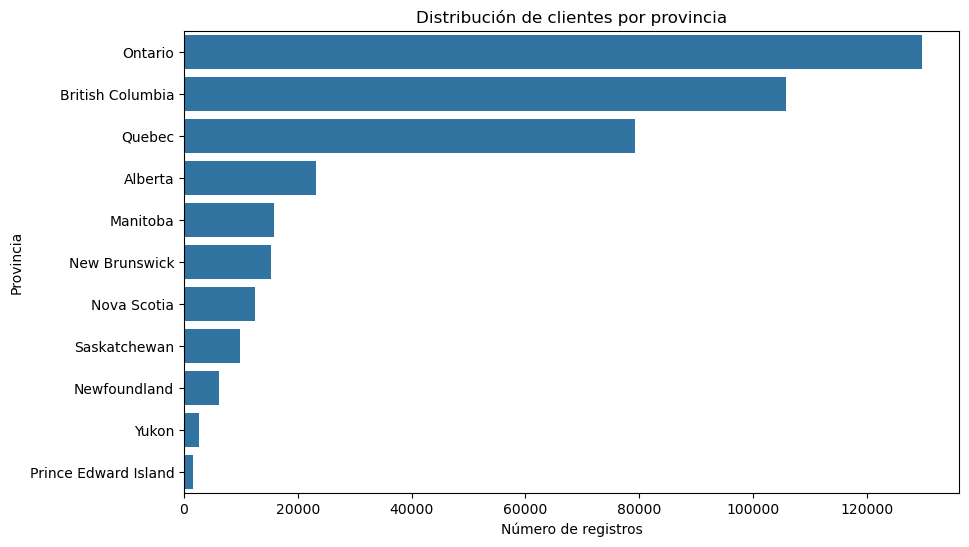

In [13]:
clientes_por_provincia = df["province"].value_counts().reset_index()
clientes_por_provincia.columns = ["province", "frecuencia"]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=clientes_por_provincia,
    x="frecuencia",
    y="province"
)

plt.title("Distribución de clientes por provincia")
plt.xlabel("Número de registros")
plt.ylabel("Provincia")
plt.show()


### Interpretación

La distribución de clientes por provincia muestra una clara concentración geográfica:

- **Ontario** es la provincia con mayor número de registros, seguida por **British Columbia** y **Quebec**.
- Estas tres provincias concentran la mayor parte de la base de clientes.
- El resto de provincias presentan volúmenes considerablemente menores, destacando Yukon y Prince Edward Island como las menos representadas.

Esto indica que el programa de fidelización tiene una fuerte presencia en determinadas regiones, lo que puede estar relacionado con densidad poblacional o con la red de rutas de la aerolínea.

## 3.4 Comparación del salario promedio por nivel educativo

Para analizar cómo varía el salario según el nivel educativo, calculamos el salario promedio por grupo y lo representamos mediante un gráfico de barras.

El objetivo es identificar posibles diferencias económicas entre niveles educativos.

📊 Salario promedio por nivel educativo


,education,salary
0,Bachelor,72644.80
1,College,72026.00
2,Doctor,178608.90
3,High School or Below,61214.63
4,Master,103757.85


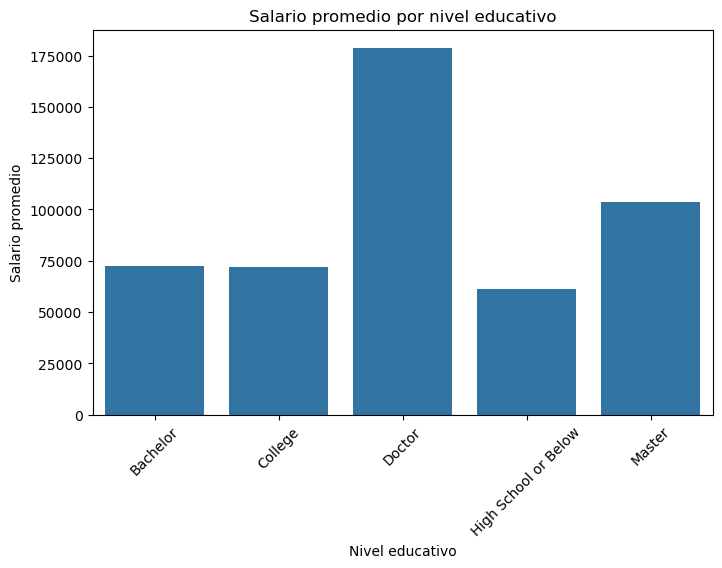

In [15]:
salario_por_educacion = (
    df.groupby("education")["salary"]
    .mean()
    .round(2)
    .reset_index())

print("📊 Salario promedio por nivel educativo")
display(salario_por_educacion)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=salario_por_educacion,
    x="education",
    y="salary"
)

plt.title("Salario promedio por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=45)
plt.show()


### Interpretación

Se observa una clara relación entre nivel educativo y salario promedio:

- El grupo con mayor salario promedio es **Doctor**, seguido por **Master**.
- Los niveles **Bachelor** y **College** presentan valores similares.
- El grupo con menor salario promedio es **High School or Below**.

La tendencia general muestra que a mayor nivel educativo, mayor salario promedio, lo cual es coherente desde el punto de vista económico.

## 3.5 Proporción de clientes por tipo de tarjeta de fidelidad

Para responder a esta pregunta analizamos la distribución de `loyalty_card`.
Usamos un gráfico de barras con porcentajes porque permite comparar proporciones de forma clara.

📊 Proporción de clientes por tipo de tarjeta (%)


,loyalty_card,porcentaje
0,Star,45.63
1,Nova,33.88
2,Aurora,20.49


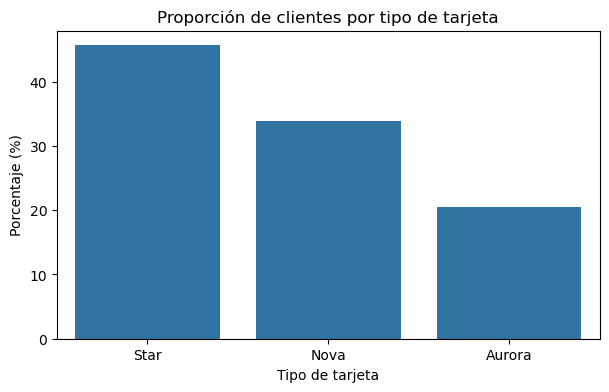

In [18]:
tarjetas = (
    df["loyalty_card"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
)

tarjetas.columns = ["loyalty_card", "porcentaje"]

print("📊 Proporción de clientes por tipo de tarjeta (%)")
display(tarjetas)

plt.figure(figsize=(7, 4))
sns.barplot(data=tarjetas, x="loyalty_card", y="porcentaje")
plt.title("Proporción de clientes por tipo de tarjeta")
plt.xlabel("Tipo de tarjeta")
plt.ylabel("Porcentaje (%)")
plt.show()


### Interpretación

En este apartado analizamos cómo se distribuyen los clientes según el tipo de tarjeta de fidelidad (`loyalty_card`).

Para ello:

- Calculamos la frecuencia relativa de cada tipo de tarjeta.
- Convertimos la proporción a porcentaje.
- Representamos los resultados mediante un gráfico de barras para facilitar la comparación visual.

Este análisis permite identificar qué tipo de tarjeta concentra mayor número de clientes y cómo se estructura el programa de fidelización.

**Interpretación:**

La distribución no es uniforme:

- **Star** es la tarjeta más frecuente (**45,63%**).
- **Nova** representa el **33,88%**.
- **Aurora** agrupa el **20,49%** restante.

Se observa una mayor concentración en el tipo **Star**, lo que indica que es el nivel predominante dentro del programa de fidelización.

### 3.6 Distribución de clientes según estado civil y género

En este apartado analizamos cómo se distribuyen los clientes combinando dos variables categóricas:

- `marital_status` (estado civil)
- `gender` (género)

El objetivo es entender si existen diferencias relevantes en la composición demográfica de la base de clientes.

Para ello:

- Calcularemos una tabla de frecuencias conjunta.
- Obtendremos los porcentajes sobre el total.
- Representaremos los resultados con un gráfico de barras agrupadas para facilitar la comparación visual.


📊 DISTRIBUCIÓN DE CLIENTES POR ESTADO CIVIL Y GÉNERO
----------------------------------------------------------------------


,marital_status,gender,frecuencia,porcentaje
0,Divorced,Female,30456,7.58
1,Divorced,Male,29976,7.46
2,Married,Female,116856,29.09
3,Married,Male,116784,29.07
4,Single,Female,54528,13.57
5,Single,Male,53088,13.22


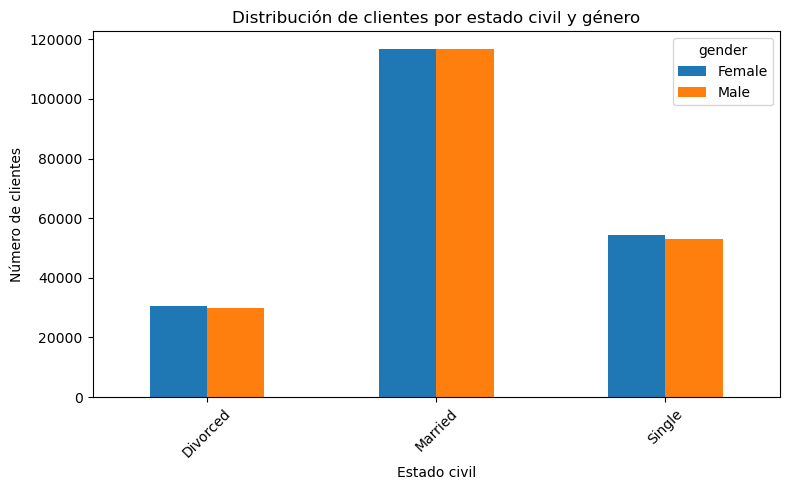

In [19]:
print("📊 DISTRIBUCIÓN DE CLIENTES POR ESTADO CIVIL Y GÉNERO")
print("-" * 70)

# Tabla de frecuencias conjunta
tabla_estado_genero = (
    df.groupby(["marital_status", "gender"])
      .size()
      .reset_index(name="frecuencia")
)

# Cálculo de porcentaje sobre el total
total_registros = len(df)
tabla_estado_genero["porcentaje"] = round(
    (tabla_estado_genero["frecuencia"] / total_registros) * 100, 2
)

display(tabla_estado_genero)

# Pivot para facilitar el gráfico
tabla_pivot = tabla_estado_genero.pivot(
    index="marital_status",
    columns="gender",
    values="frecuencia"
)

# Gráfico de barras agrupadas
tabla_pivot.plot(kind="bar", figsize=(8, 5))

plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretación — Distribución por estado civil y género

La distribución muestra que la mayor parte de los clientes se encuentran en estado civil **Married (casados)**, representando aproximadamente:

- 29,09% mujeres casadas
- 29,07% hombres casados

En conjunto, los clientes casados suponen cerca del **58% del total**, lo que indica que este es el perfil predominante en la base de datos.

En segundo lugar se encuentran los clientes **Single (solteros)**, con:

- 13,57% mujeres
- 13,22% hombres

Por último, los clientes **Divorced (divorciados)** representan el grupo más pequeño:

- 7,58% mujeres
- 7,46% hombres

En general, la distribución por género es muy equilibrada en todos los estados civiles, sin diferencias significativas entre hombres y mujeres. Esto sugiere que el estado civil no presenta un sesgo relevante por género dentro de la muestra.

Desde el punto de vista visual, el gráfico presenta una distribución bastante simétrica entre géneros dentro de cada categoría, reforzando la idea de equilibrio demográfico en la base de clientes.

## Fase 4 — Diferencias en reservas de vuelos por nivel educativo

En esta fase evaluamos si existen diferencias en el número de vuelos reservados (`flights_booked`) según el nivel educativo (`education`).

Para ello seguimos los siguientes pasos:

1. Filtramos el dataset para quedarnos únicamente con las columnas relevantes:  
   `flights_booked` y `education`.
   
2. Agrupamos por nivel educativo y calculamos estadísticas descriptivas básicas, como:
   - número de registros
   - media
   - desviación estándar
   - mediana
   - mínimos y máximos

Este análisis permite comparar el comportamiento de reserva entre grupos educativos.


In [20]:
print("📊 FASE 4 — VUELOS RESERVADOS SEGÚN NIVEL EDUCATIVO")
print("-" * 80)

# 1) Filtrado de columnas relevantes
df_fase4 = df[["education", "flights_booked"]].copy()

print("✅ Dataset filtrado (education + flights_booked)")
print("Filas:", df_fase4.shape[0], "| Columnas:", df_fase4.shape[1])
display(df_fase4.head())

# 2) Estadísticas descriptivas por grupo
resumen_educacion = (
    df_fase4.groupby("education")["flights_booked"]
    .agg(
        n="count",
        media="mean",
        desviacion_std="std",
        mediana="median",
        minimo="min",
        maximo="max"
    )
    .round(2)
    .reset_index()
)

print("\n📌 Estadísticas descriptivas de flights_booked por nivel educativo")
display(resumen_educacion)


📊 FASE 4 — VUELOS RESERVADOS SEGÚN NIVEL EDUCATIVO
--------------------------------------------------------------------------------
✅ Dataset filtrado (education + flights_booked)
Filas: 401688 | Columnas: 2


,education,flights_booked
0,Bachelor,3
1,Bachelor,2
2,Bachelor,14
3,Bachelor,4
4,Bachelor,0



📌 Estadísticas descriptivas de flights_booked por nivel educativo


,education,n,media,desviacion_std,mediana,minimo,maximo
0,Bachelor,251400,4.13,5.26,1.0,0,39
1,College,101712,4.19,5.29,1.0,0,38
2,Doctor,17616,4.20,5.31,1.0,0,32
3,High School or Below,18768,4.21,5.30,1.0,0,31
4,Master,12192,4.23,5.27,1.0,0,33


### Visualización — Flights Booked según nivel educativo

Para complementar el análisis descriptivo anterior, vamos a visualizar la distribución del número de vuelos reservados (`flights_booked`) según el nivel educativo.

El objetivo es observar:

- Si existen diferencias visibles en la mediana.
- Si la dispersión cambia entre grupos.
- Si hay diferencias en la presencia de valores extremos.

Utilizaremos un boxplot, ya que permite comparar fácilmente la distribución entre varias categorías.

📊 BOXPLOT — Flights Booked por nivel educativo
----------------------------------------------------------------------


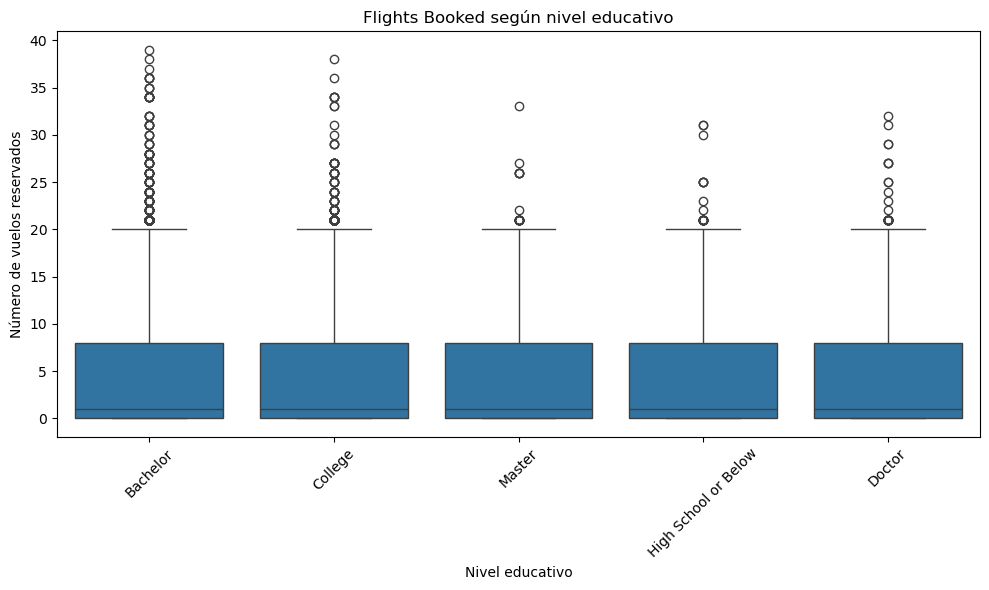

In [21]:
print("📊 BOXPLOT — Flights Booked por nivel educativo")
print("-" * 70)

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x="education",
    y="flights_booked"
)

plt.title("Flights Booked según nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Número de vuelos reservados")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretación final — Fase 4: Vuelos reservados según nivel educativo

A partir del análisis descriptivo y del boxplot observamos que:

- Las **medias** de vuelos reservados son muy similares entre todos los niveles educativos (entre 4,13 y 4,23).
- La **mediana es 1 en todos los grupos**, lo que indica que el comportamiento típico es reservar pocos vuelos al mes, independientemente del nivel educativo.
- La **dispersión (desviación estándar)** es prácticamente igual en todos los niveles (~5,3), lo que sugiere que la variabilidad es comparable.
- El boxplot muestra una distribución muy parecida entre grupos:
  - Medianas alineadas.
  - Rangos intercuartílicos similares.
  - Presencia de valores extremos en todos los niveles educativos.

Desde el punto de vista visual, no se observan diferencias claras ni desplazamientos sistemáticos entre categorías.  
La distribución es asimétrica a la derecha en todos los casos (muchos valores bajos y algunos valores altos), pero esta forma se mantiene constante en todos los niveles educativos.

📌 Conclusión:
No se aprecian diferencias relevantes en el número de vuelos reservados según el nivel educativo del cliente.  
Cualquier pequeña diferencia en la media parece mínima y probablemente no significativa desde un punto de vista práctico.
